# A Gentle Introduction to Machine Learning with sklearn

## Basic Tenets

> [Machine Learning] gives computers the ability to learn without being explicitly programmed
>~Arthur Samuel

Finding ways to make machine predict an outcome based on data.
Examples:
1. Given newspaper articles, determine their sentiment, that is, is the article overall positive or negative?
2. Given the amount of time a student studied last night, predict their test score (0-100)
3. Given a whole bunch of pictures, try to name what they are (is it a car?  is it red?  is it alive?)

**Supervised Learning**
Using data with predetermined outcomes to train a model. (e.g. 1,2)

**Unsupervised Learning**
Given data without predetermined outcomes or labels, try to find some pattern (this is harder). (e.g. 3)

**Classification**
Data outcomes given discrete labels (e.g. 1, 3)

**Regression**
Data results in outcomes that are continuous in nature (e.g. 2)

Data comes in the form of features.  For example,
1. Word counts in a newspaper article
2. Number of hours
3. The pixel values

## The Machine Learning Pipeline:
- **Preprocessing/Feature Extraction** - Obtain the data, clean it, and try to get it into a usable form.  This can include imputation (filling in missing data), or scaling the data, etc.  For example, so called "bag of words" representation of text consists of a dictionary of words and then the number of each word that appears in each text document
- **Feature Selection** - Find out what features are relevant (e.g. which words that appear tell you the most about the sentiment of a newspaper article?  Words like "the" are likely to be irrelevant.  Words like "happy" might mean something.
- **Fitting/Training** - Models are actually mathematical formulas that have adjustable parameters.  These parameters can change to yield different outcomes given input data.  In this step, the machine will read in the data and find parameters that maximize some measure that quantifies the quality of its prediction (for example, compute a probability that a data point is predicted correctly and then try to maximize this probability; this is called an MLE - Maximum Likelihood Estimate)
- **Model Selection/Tuning** - Many models have hyperparameters, that is, parameters that YOU the programmer must set up to maximize the quality of the model's predictions.  Sometimes you need to do a little guess and check (try 1 set of hyperparameters on a portion of the set and see how good it is, then try another).  This technique is called Cross Validation
- **Prediction** - Using your tuned and trained model, you can predict test data (equivalent to plugging in values into a massive equation and observing the result)
- **Model Evaluation** - Look at some measures of evaluation (e.g. accuracy/precision of classification, mean squared error for regression, etc.)

Ok, let's play with some data!

## Playing with the MNIST Data set

We will use one of sklearn's many pre-provided data sets, digits - a sample of the MNIST handwritten numbers.

In [1]:
from sklearn import datasets
import numpy as np

digits = datasets.load_digits()
print(digits['DESCR'])
print("Data shape: {}".format(digits.data.shape))
print("Target shape: {}".format(digits.target.shape))
np.column_stack([digits.data, digits.target])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   1.],
       [  0.,   0.,   0., ...,   9.,   0.,   2.],
       ..., 
       [  0.,   0.,   1., ...,   0.,   0.,   8.],
       [  0.,   0.,   2., ...,   0.,   0.,   9.],
       [  0.,   0.,  10., ...,   1.,   0.,   8.]])

Lets get a feel for what kind of data we're dealing with here.

Sample label: 8


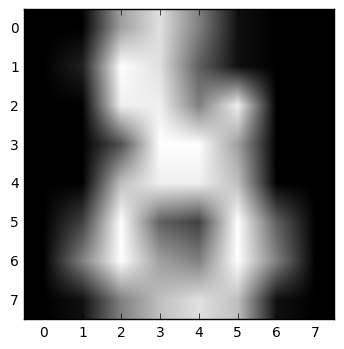

In [3]:
import matplotlib.pyplot as plt

def display_digit(digit_data):
    div = np.full((8,8), 16, dtype=int)
    dig = digit_data.reshape(8,8) / div
    plt.imshow(dig, cmap="gray")
    plt.show()

sample = 1796 # change this to anything between 0 and size of data set (1796) to view a plot of any data point
print("Sample label: {}".format(digits.target[sample]))
display_digit(digits.data[sample])

Now let's pick a model and train it with this data!

Classifier predicted [8]
Actual value: 8


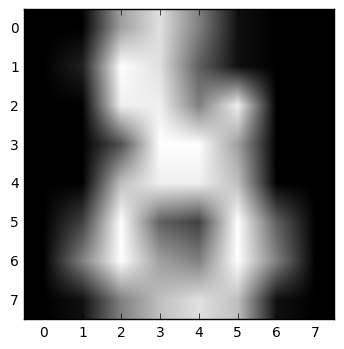

In [4]:
from sklearn.svm import LinearSVC

# Step 1: Create the classifier, specifying parameters (or use defaults)
clf = LinearSVC()

# Step 2: Fit the data!
clf.fit(digits.data, digits.target)

# Step 3: Try predicting something
pred_num = 1796 # Change this to anything between 0 and the size of data set (1796) to predict a different data point
pred = clf.predict([digits.data[pred_num]])
print("Classifier predicted {}".format(pred))
print("Actual value: {}".format(digits.target[pred_num]))
display_digit(digits.data[pred_num])

Now let's evaluate the robustness of our model

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# predict everything we originally trained on
pred = clf.predict(digits.data)
print("Accuracy: {}".format(accuracy_score(digits.target, pred)))
print(classification_report(digits.target, pred))

Accuracy: 0.9794101279910963
             precision    recall  f1-score   support

          0       0.99      1.00      1.00       178
          1       1.00      0.87      0.93       182
          2       1.00      0.99      0.99       177
          3       0.97      1.00      0.99       183
          4       1.00      1.00      1.00       181
          5       0.99      1.00      0.99       182
          6       1.00      1.00      1.00       181
          7       1.00      1.00      1.00       179
          8       0.86      0.99      0.92       174
          9       0.99      0.95      0.97       180

avg / total       0.98      0.98      0.98      1797



This is remarkably accurate!  However, in this case we've tested our model with the same data we trained this with.  To illustrate this, we will split the data and use a different model to motivate why this is the case.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.33, random_state=1)

print("Train X shape: {}".format(X_train.shape))
print("Test X shape: {}".format(X_test.shape))


Train X shape: (1203, 64)
Test X shape: (594, 64)


Let's try a different model this time, called K-Nearest Neighbors (KNN)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# If there are n features in the data and we were to plot the points in an n dimensional space
# KNN will assign a label based on the labels of the closest k points to the data point we wish to predict
clf = KNeighborsClassifier(n_neighbors=5) # Here we let k=5
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train) # predict using the training data
accuracy_score(y_train, y_pred)

0.98836242726517043

Here, k is a hyperparameter, meaning we could change it to get better performance.  Can we do better?

In [8]:
clf = KNeighborsClassifier(n_neighbors=1) # now k=1
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train) # predict using the training data
accuracy_score(y_train, y_pred)

1.0

The prediction on training data was perfect (why?).  But how will it do on the test data set?

In [9]:
y_pred = clf.predict(X_test) # predict using the training data
accuracy_score(y_test, y_pred)

0.98821548821548821

Let's try to find a k that will give us the best results on the test data set.

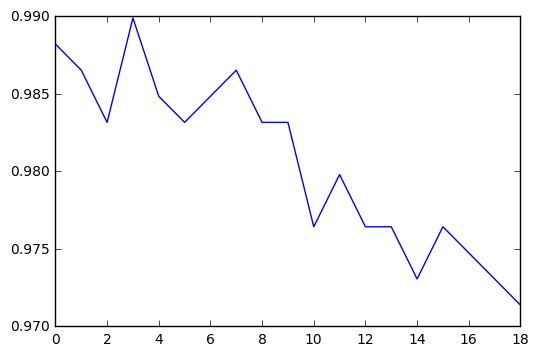

In [10]:
k_results = []
for i in range(1, 20):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    k_results.append(accuracy_score(y_test, y_pred))

plt.plot(k_results)
plt.show()

## Playing With 20 Newsgroup Dataset

Consists of 18k newsgroup posts on 20 different topics.  Given a post, can we find out what topic it's on?

In [11]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [12]:
print("FileNames: {}".format(newsgroups_train.filenames.shape));
print("Target: {}".format(newsgroups_train.target.shape));
datapoint=1 # view a data point, pick from 0 to 11313
print(newsgroups_train.data[datapoint])
print(newsgroups_train.target_names[newsgroups_train.target[datapoint]])

FileNames: (11314,)
Target: (11314,)
From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>

comp.sys.mac.hardware


How can we convert text into features that we can plug into mathematical models?  Enter feature_extraction.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Create bag-of-words representation of text, ignoring stopwords (like "the" or "of", etc.)
vectorizer = CountVectorizer(stop_words='english') 
vectors_train = vectorizer.fit_transform(newsgroups_train.data)
vectors_train.shape

(11314, 129796)

In [14]:
vocab = vectorizer.vocabulary_
vocab

{'relevent': 100480,
 'unallocated': 118104,
 'z07': 128454,
 '_d2': 23662,
 '670': 17114,
 '060493164354': 1185,
 'triumphs': 116314,
 'infirm': 66985,
 'viele': 121213,
 'milsh': 82013,
 'lqfco6kv': 76849,
 'daniel': 44941,
 'p5j6': 91260,
 'covenants': 42946,
 'qtcaw0l4on': 97969,
 '4akw': 14219,
 '133856': 3957,
 'vacationing': 120241,
 'jbv': 69506,
 'refute': 100206,
 'vv617': 122126,
 'mccall': 80108,
 '2i1': 10837,
 '05xk87': 1165,
 '0180': 591,
 'firoozye': 55430,
 'chest': 39236,
 'responders': 101147,
 '1pqtq1innj5c': 7283,
 'maht': 78803,
 'keysyms': 72239,
 'histogram': 63223,
 'beerb': 32457,
 '734085409': 18600,
 'stevethc5lm2e': 110422,
 'mk16wmzvm': 82588,
 'grammes': 59980,
 'pinhead': 93731,
 'gorgeous': 59731,
 'forsee': 56371,
 'centralized': 38592,
 'dissaproves': 47830,
 '082430': 1404,
 'trolleybus': 116347,
 'sept': 105935,
 'uixn': 117832,
 'institional': 67465,
 'oss5': 90442,
 'oke': 89432,
 'wheel': 123728,
 'uncomplicated': 118219,
 'echelons': 50221,
 'co

In [15]:
# Let's view a vector for the datapoint we saw earlier
# vectors is a sparse matrix, so we have to convert to a dense matrix.
data_mat = vectors_train[datapoint].todense()
print(data_mat.shape)
data_mat

(1, 129796)


matrix([[0, 0, 0, ..., 0, 0, 0]])

In [16]:
# let's see the count for a specific word
data_mat[(0,vocab['clock'])]

5

Let's naively try fitting the data now, using ... wait for it ... a Naive Bayes Classifier!

In [17]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(vectors_train, newsgroups_train.target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
# Get test data, we must use the same vectorizer or else we'll end up with a different feature set!
newsgroups_test = fetch_20newsgroups(subset='test')
vectors_test = vectorizer.transform(newsgroups_test.data)
vectors_test.shape

(7532, 129796)

In [19]:
y_pred = clf.predict(vectors_test)
y_pred.shape
accuracy_score(newsgroups_test.target, y_pred)

0.80231014338821027

Many words have little to no predictive value and are just noise so we want to get rid of them through a process called Feature Selection.  This means we can test fewer words with little impact (or even improvement) in predictive accuracy.

In [20]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectPercentile

ch2 = SelectPercentile(chi2, percentile=5) # use "percentile" best features
y_train = newsgroups_train.target
X_train = ch2.fit_transform(vectors_train, y_train)
y_test = newsgroups_test.target
X_test = ch2.transform(vectors_test)

inv_vocab = {v: k for k, v in vocab.items()} # maps from index to word

# list most important words
feature_names = [inv_vocab[i] for i in ch2.get_support(indices=True)]
feature_names

['00',
 '000',
 '0002',
 '005',
 '01',
 '02',
 '02106',
 '0223',
 '02238',
 '02p',
 '03',
 '030',
 '04',
 '040',
 '0444',
 '05',
 '06',
 '0705',
 '0b',
 '0c',
 '0d',
 '0e',
 '0ek',
 '0el',
 '0em',
 '0g',
 '0h6',
 '0i',
 '0j',
 '0l',
 '0m',
 '0p',
 '0q',
 '0qax',
 '0qu',
 '0r',
 '0s',
 '0t',
 '0tbxn',
 '0tq',
 '0u',
 '0w',
 '0x',
 '0x0',
 '10',
 '1016',
 '1020',
 '102nd',
 '103rd',
 '11',
 '110v',
 '12',
 '120vac',
 '124e',
 '128',
 '1280x1024',
 '13',
 '130',
 '13h',
 '13p',
 '13q',
 '13qs',
 '13s',
 '13s1',
 '14',
 '144',
 '144e',
 '145',
 '147',
 '14di',
 '15',
 '1542',
 '1542b',
 '15o',
 '16',
 '16550',
 '16m',
 '16mb',
 '17',
 '1708',
 '175u',
 '1777',
 '1778',
 '17u',
 '18',
 '18084tm',
 '18f',
 '19',
 '1914',
 '1915',
 '1918',
 '1919',
 '1920',
 '1923',
 '1924',
 '1934',
 '1948',
 '1967',
 '1982',
 '1992',
 '1993',
 '1993apr15',
 '1993apr20',
 '1_',
 '1b',
 '1c',
 '1d',
 '1d2',
 '1d9',
 '1d9l',
 '1eq',
 '1eqtm',
 '1f',
 '1f9',
 '1f9f8',
 '1fp',
 '1fp4',
 '1fp4u',
 '1fpl',
 '1j',


In [21]:
# Train with new set
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred.shape
accuracy_score(y_test, y_pred)

0.78027084439723848

Let's see what the most important features were by looking at their coefficients (that is how important they were in the model)

In [22]:
category = 1
print(newsgroups_train.target_names[category])
feature_coefs = np.column_stack([np.array(feature_names), clf.coef_[category]])
feature_coefs = np.core.records.fromarrays(feature_coefs.transpose(), names='feature, coef', formats = 'S8, f8')
feature_coefs = np.sort(feature_coefs, order=['coef'], kind='mergesort')
feature_coefs.shape

comp.graphics


(6490,)

In [23]:
[x[0] for x in feature_coefs[-10:-1]] # print 10 best features

[b'files',
 b'nntp',
 b'jpeg',
 b'host',
 b'file',
 b'posting',
 b'com',
 b'image',
 b'graphics']